In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_excel('churn.xlsx')

In [3]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [4]:
varc = [c for c in df.columns if c[:2]=='V_']
vard = [c for c in df.columns if c[:2]=='C_']

In [5]:
for c in vard:
    print(df[c].value_counts(normalize=True))
    print('\n')

No     0.90432
Yes    0.09568
Name: C_IP, dtype: float64


No     0.729739
Yes    0.270261
Name: C_VMP, dtype: float64




In [6]:
df[varc].describe(percentiles=[0.01,0.99])

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
count,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000
mean,101.033559,7.805784,30.545812,100.234559,17.108693,100.231703,9.025773,4.443770,2.778911,1.544448
std,37.575889,13.349831,8.630344,18.625260,4.043765,18.488439,2.132611,2.276855,0.684567,1.267832
min,12.000000,0.000000,8.810000,53.000000,6.740000,57.000000,3.570000,1.000000,0.890000,0.000000
1%,19.000000,0.000000,10.680000,58.000000,7.850000,61.000000,4.340000,1.000000,1.160000,0.000000
50%,101.000000,0.000000,30.460000,100.000000,17.200000,100.000000,9.040000,4.000000,2.780000,1.000000
99%,185.000000,41.000000,49.500000,142.000000,25.930000,142.000000,13.740000,11.000000,4.290000,5.000000
max,195.000000,43.000000,51.880000,147.000000,27.120000,147.000000,14.300000,13.000000,4.510000,6.000000


In [7]:
df=df[(df['V_ACCT_LGHT']>=19) & (df['V_ACCT_LGHT']<=185)].copy()

In [8]:
df.shape

(2751, 14)

In [9]:
df.reset_index(drop=True,inplace=True)
df['ID'] = df.index+1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba73af4160>,
      dtype=object)

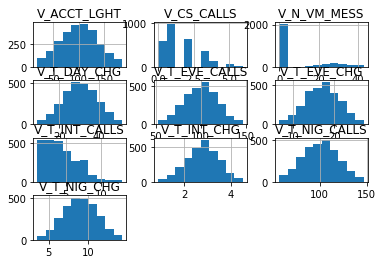

In [10]:
df[varc].hist()

In [11]:
df[varc].corr()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS
V_ACCT_LGHT,1.000000,-0.002289,0.022809,0.030887,-0.000528,0.004164,-0.011746,0.034243,0.016511,-0.005611
V_N_VM_MESS,-0.002289,1.000000,-0.000843,-0.007781,0.021667,-0.004223,-0.001643,0.014644,0.001329,-0.010155
V_T_DAY_CHG,0.022809,-0.000843,1.000000,0.008669,0.007000,0.007896,0.001020,0.004583,-0.002633,-0.014642
V_T_EVE_CALLS,0.030887,-0.007781,0.008669,1.000000,-0.008791,0.015189,0.012802,-0.001813,-0.019933,-0.017936
V_T_EVE_CHG,-0.000528,0.021667,0.007000,-0.008791,1.000000,-0.012395,-0.016811,0.015583,-0.001942,-0.033219
V_T_NIG_CALLS,0.004164,-0.004223,0.007896,0.015189,-0.012395,1.000000,0.011645,-0.001237,0.003764,-0.016579
V_T_NIG_CHG,-0.011746,-0.001643,0.001020,0.012802,-0.016811,0.011645,1.000000,0.003888,-0.029332,-0.029909
V_T_INT_CALLS,0.034243,0.014644,0.004583,-0.001813,0.015583,-0.001237,0.003888,1.000000,-0.005425,-0.006292
V_T_INT_CHG,0.016511,0.001329,-0.002633,-0.019933,-0.001942,0.003764,-0.029332,-0.005425,1.000000,-0.008844
V_CS_CALLS,-0.005611,-0.010155,-0.014642,-0.017936,-0.033219,-0.016579,-0.029909,-0.006292,-0.008844,1.000000


In [12]:
for c in vard:
    aux = df[[c,'TARGET']].copy()
    aux['n']=1
    aux=aux.pivot_table(columns='TARGET',
                    index=c,
                    aggfunc='count',
                    values='n',
                    fill_value=0)
    aux.reset_index(inplace=True)
    aux[0]/=aux[0].sum()
    aux[1]/=aux[1].sum()
    aux['woe'] = np.log(aux[0]/aux[1])
    df = df.merge(aux[['woe',c]],how='inner',on=c)
    df.rename(columns={'woe':'w_%s'%c},inplace=True)

In [13]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID,w_C_IP,w_C_VMP
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1,0.261388,0.527991
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2,0.261388,0.527991
2,85,No,Yes,27,33.39,90,23.88,75,4.02,4,3.73,1,0,8,0.261388,0.527991
3,76,No,Yes,33,32.25,65,18.09,108,7.46,5,2.70,1,0,10,0.261388,0.527991
4,57,No,Yes,39,36.21,112,16.24,115,8.22,3,2.57,0,0,17,0.261388,0.527991


In [14]:
varw = [v for v in df.columns if v[:2]=='w_']

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import pickle

#### Preparación de TAD 

In [16]:
X = df[varc+varw].copy()
y = df['TARGET'].copy()
pipe_sc = make_pipeline(MinMaxScaler()) 
pipe_pca = make_pipeline(StandardScaler(),PCA(),MinMaxScaler())
mds = MDS(n_components=5)

In [18]:
Xs=pd.DataFrame(pipe_sc.fit_transform(X),columns=X.columns)
Xpca=pd.DataFrame(pipe_pca.fit_transform(X),
                  columns=['p%d'%x for x in range(1,len(X.columns)+1)])
#Xmds = pd.DataFrame(pipe_sc.fit_transform(mds.fit_transform(Xs)),
#                    columns=['p%d'%x for x in range(1,6)])

/home/jose/Documentos/rubik/lib64/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/jose/Documentos/rubik/lib64/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jose/Documentos/rubik/lib64/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
def metricas(modelo,Xt,Xv,yt,yv):
    print('roc:\n')
    print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
    print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))
    print('accuracy:\n')
    print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
    print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

#### Árbol de decisión

In [20]:
param= dict(criterion = ['gini','entropy'],
splitter = ['best','random'],
max_depth = range(1,10))

In [21]:
Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7)

from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(Xt,yt)

metricas(modelo,Xt,Xv,yt,yv)


grid = GridSearchCV(param_grid=param,estimator=modelo,cv=5,
                    n_jobs=-1,
                    scoring='roc_auc')
grid.fit(X,y)


metricas(grid.best_estimator_,Xt,Xv,yt,yv)


roc:

1.0
0.8015298688683826
accuracy:

1.0
0.9067796610169492


/home/jose/Documentos/rubik/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


roc:

0.9185678694398566
0.94834871296746
accuracy:

0.9522077922077922
0.9624697336561744


In [22]:
pickle.dump(grid.best_estimator_,open('arbol_entrenado.mod','wb'))

#### Red Neuronal 

In [ ]:
param=dict(hidden_layer_sizes = [(x,y,z,) for x in range(5,35,5) for y in range(5,35,5) for z in range(5,35,5)],
           activation = ['identity', 'logistic', 'tanh', 'relu'],
           max_iterations=10000,
learning_rate = ['constant', 'invscaling', 'adaptive'])

In [ ]:
%%time
Xt, Xv, yt, yv = train_test_split(Xs,y,train_size=0.7)

from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier()
modelo.fit(Xt,yt)

metricas(modelo,Xt,Xv,yt,yv)


grid = RandomizedSearchCV(param_distributions=param,n_iter=100,
                          estimator=modelo,cv=5,n_jobs=-1,
                          scoring='roc_auc',verbose=True)
grid.fit(X,y)


metricas(grid.best_estimator_,Xt,Xv,yt,yv)


In [ ]:
from sklearn.linear_model import SGDClassifier

#### XGBoost 

In [23]:
from xgboost.sklearn import XGBClassifier

In [24]:
modelo = XGBClassifier()

In [27]:
param=dict(max_depth = range(2,10),
learning_rate = np.arange(0.1,1,0.1),
n_estimators = range(10,200,10))

In [29]:
modelo.fit(Xt,yt)

metricas(modelo,Xt,Xv,yt,yv)

grid = RandomizedSearchCV(param_distributions=param,n_iter=200,
                          estimator=modelo,cv=5,n_jobs=-1,
                          scoring='accuracy',verbose=True)
grid.fit(X,y)


metricas(grid.best_estimator_,Xt,Xv,yt,yv)


roc:

0.9707308083494294
0.9317872753763964
accuracy:

0.9709090909090909
0.9588377723970944
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.0min


roc:

0.996017971614926
0.9935162700339971
accuracy:

0.9797402597402597
0.9842615012106537


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


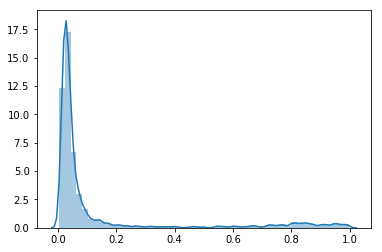

In [34]:
sns.distplot(modelo.predict_proba(Xt)[:,1])

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
modelo = LogisticRegression()
modelo.fit(Xt,yt)

metricas(modelo,Xt,Xv,yt,yv)


roc:

0.8025081880021275
0.8125667799902865
accuracy:

0.8711688311688311
0.864406779661017


/home/jose/Documentos/rubik/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/jose/Documentos/rubik/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


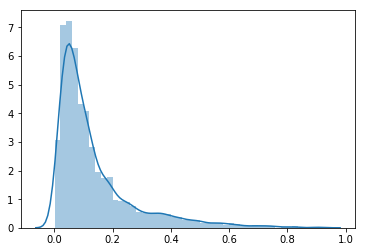

In [37]:
sns.distplot(modelo.predict_proba(Xt)[:,1])